# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 각 Feature들에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias는 선형 회귀 모델 학습 과정에서 최적화해야 하는 파라미터다.
  - 가중치는 각 feature(X) 가 target(y)에 미치는 영향도를 나타내는 값이다.
  - 양수 가중치는 target값을 증가시키고, 음수 가중치는 감소시킨다. 0에서 멀 수록 target에 큰 영향을 미치는 feature이며, 0에 가까울수록 target과의 연관성이 적은 feature다.
  - bias는 모든 feature가 0일 때의 target 값이다. 
- $\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b$
    - $\hat{y_i}$: 예측값
    - $x$: 특성(feature-컬럼)
    - $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
    - $b$: 절편
    - $p$: p 번째 특성(feature)/p번째 가중치
    - $i$: i번째 관측치(sample)

## 실습
#### Boston housing dataset loading

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data, x,y 분리
df = pd.read_csv("data/boston_dataset.csv")
X = df.drop(columns='MEDV')
y = df['MEDV']

# train/test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [23]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## LinearRegression
- 가장 기본적인 선형 회귀 모델
- 각 Feauture에 가중합으로 Y값을 추론한다.
- 학습 결과 속성(Instance 변수)
    - **coef_**: 각 Feature에 곱하는 가중치 (찾은 파라미터)
    - **intercept_**: y절편. 모든 Feature가 0일때 예측값
    
### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

In [24]:
# 전처리
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델 생성, 학습

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [27]:
## 학습을 통해 찾은 weights 와 bias 조회
print("weights")
print(lr.coef_)

weights
[-0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476   2.57321942
 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735  0.71817947
 -3.59245482]


In [29]:
import pandas as pd
pd.Series(lr.coef_, index=X_train.columns)

CRIM      -0.970820
ZN         1.057149
INDUS      0.038311
CHAS       0.594506
NOX       -1.855148
RM         2.573219
AGE       -0.087615
DIS       -2.880943
RAD        2.112245
TAX       -1.875331
PTRATIO   -2.292767
B          0.718179
LSTAT     -3.592455
dtype: float64

In [30]:
print("bias")
lr.intercept_

bias


np.float64(22.611881188118804)

##### 평가

In [31]:
## 회귀 - mse, rmse, (ma-절대값-e), r2
from metrics import print_regression_metrcis

print_regression_metrcis(y_train, lr.predict(X_train_scaled), title="Transet")

Transet
MSE: 19.32647020358573
RMSE: 4.396188144698282
R Squared: 0.7730135569264233


In [32]:
print_regression_metrcis(y_test, lr.predict(X_test_scaled), title="Testset")

Testset
MSE: 33.448979997676496
RMSE: 5.783509315085133
R Squared: 0.5892223849182512


### Pipeline 이용
- Feature Scaler -> LinearRegression

In [33]:
from sklearn.pipeline import Pipeline

pl = Pipeline([("scaler", StandardScaler()),("model", LinearRegression())], verbose=True)

pl.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())],
         verbose=True)

In [34]:
pred = pl.predict(X_test) # 전처리 하기 전 데이터를 넣어준다.

In [35]:
y_test.mean()

np.float64(22.21960784313725)

In [36]:
print_regression_metrcis(y_test, pred)

MSE: 33.448979997676496
RMSE: 5.783509315085133
R Squared: 0.5892223849182512


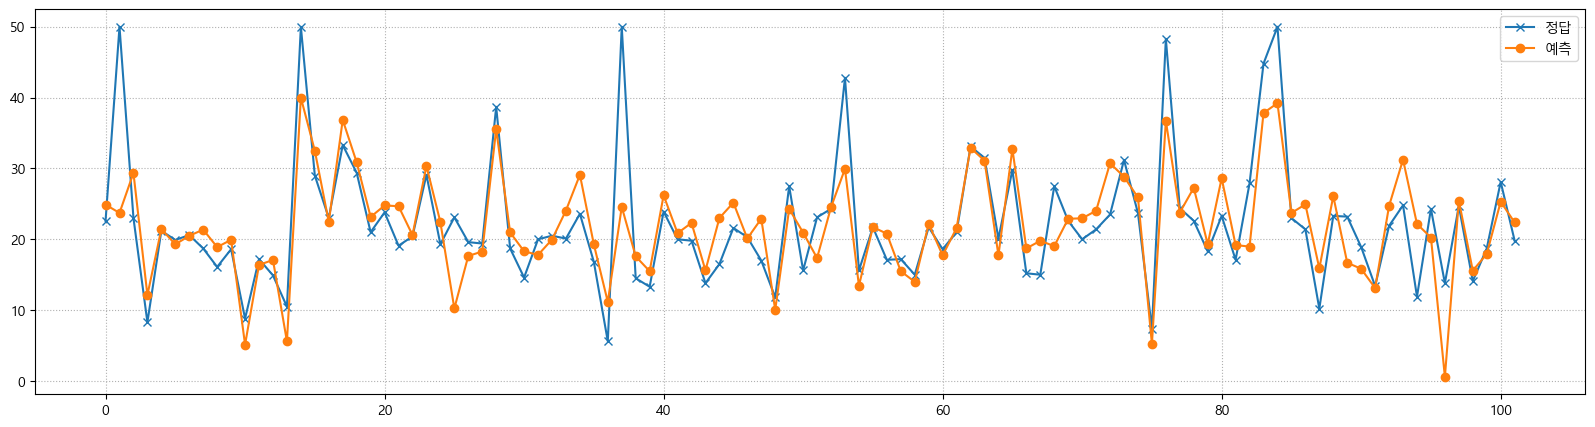

In [ ]:
### y_test 정답과 추론값 비교 - 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
# X축: 몇번째 데이터에 대한 예측인지 index
y_test.index
plt.plot(range(y_test.size), y_test, marker="x", label="정답")
plt.plot(range(y_test.size), pred, marker='o', label="예측")
plt.legend()
plt.grid(True, linestyle=":")
plt.show()

# 다항회귀 (Polynomial Regression)
- 전처리방식 중 하나로 Feature가 너무 적어 y의 값들을 다 설명하지 못하여 underfitting이 된 경우 Feature를 늘려준다.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한다.
    - 파라미터(Coef, weight)를 기준으로는 일차식이 되어 선형모델이다. 그렇지만 input 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

# 모델링을 통해 찾아야 하는 함수.
def func(X):
    return X**2 + X + 2 + np.random.normal(0,1, size=(X.size, 1))
    
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = func(X)
y = y.flatten()

print(X.shape, y.shape)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,  y)
plt.show()

##### 모델생성, 학습

In [ ]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,  y, label="y")
plt.scatter(X, pred, label='y hat(예측)')
plt.legend()
plt.show()

In [ ]:
lr.coef_, lr.intercept_

In [ ]:
from metrics import print_regression_metrcis
print_regression_metrcis(y, pred)

##### PolynomialFeatures를 이용해 다항회귀구현

In [ ]:
X.shape

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pnf = PolynomialFeatures(
    degree=2,            # 최고차항의 차수. ex) degree=4로 하면: x(원래 컬럼), x^2, x^3, x^4  한 feature추가.
    include_bias=False,  #True(기본값) - 상수항 feature 생성여부. (모든 값이 1인 feature 추가여부)
)
# pnf.fit(X)
# pnf.transform(X)
X_poly = pnf.fit_transform(X)

In [ ]:
print(X.shape, X_poly.shape)

In [ ]:
X[:3]

In [ ]:
X_poly[:3]

##### LinearRegression 모델을 이용해 평가

In [ ]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)

In [ ]:
lr2.coef_, lr2.intercept_

##### 시각화

In [ ]:
X_new = np.linspace(-3, 3, 1000)[..., np.newaxis]  # (1000, ) -> (1000, 1)
X_new_poly = pnf.transform(X_new)
# X_new_poly.shape
y_hat = lr2.predict(X_new_poly)

In [ ]:
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = "malgun gothic"
# plt.rcParams['axes.unicode_minus'] = False

plt.scatter(X, y, label="정답")
plt.plot(X_new, y_hat, color='k', linewidth=2, label="Model추정")
plt.plot(X_new, lr.predict(X_new), color="r", linewidth=2, label="Label 전처리전")
plt.legend()
plt.show()

In [ ]:
# 평가
from metrics import print_regression_metrcis
print_regression_metrcis(y, lr2.predict(X_poly))

## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

In [ ]:
pnf3 = PolynomialFeatures(degree=25, include_bias=False)
X_poly3 = pnf3.fit_transform(X)
print(X_poly3.shape)
lr3 = LinearRegression()
lr3.fit(X_poly3, y)

In [ ]:
pred3 = lr3.predict(X_poly3)
print_regression_metrcis(y, pred3)

In [ ]:
# degree=25 시각화
y_hat = lr3.predict(pnf3.transform(X_new))
plt.scatter(X, y, label="정답")
plt.plot(X_new, y_hat, color='k', linewidth=2, label="Model추정")
plt.legend()
plt.title("degree=25로 전처리한 결과")
# plt.ylim(-5, 20)
plt.show()

### PolynomialFeatures 예제

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
data = np.arange(12).reshape(6, 2)
data

In [ ]:
pnf = PolynomialFeatures(degree=2, include_bias=False)
poly2 = pnf.fit_transform(data)
poly2.shape

In [ ]:
# 변환 후 각 feature를 어떻게 계산했는지 조회
pnf.get_feature_names_out()

In [ ]:
poly2

In [ ]:
pd.DataFrame(poly2, columns=pnf.get_feature_names_out())

In [ ]:
pnf2 = PolynomialFeatures(degree=5, include_bias=False)
poly_n = pnf2.fit_transform(data)
poly_n.shape, data.shape

In [ ]:
pnf2.get_feature_names_out()

### PolynomialFeatures를 Boston Dataset에 적용

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from metrics import print_regression_metrcis

df = pd.read_csv('data/boston_dataset.csv')
X = df.drop(columns='MEDV')
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# 전처리 pipeline
preprocessor = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)), 
    ("scaler", StandardScaler()), 
])

In [ ]:
tmp = preprocessor.fit_transform(X_train)

In [ ]:
X_train.shape

In [ ]:
tmp.shape

In [ ]:
preprocessor.steps[0][1].get_feature_names_out()

#### 모델링

In [ ]:
pipeline = Pipeline([
    ("preprocessor", preprocessor), 
    ("model", LinearRegression())
])

In [ ]:
# 학습
pipeline.fit(X_train, y_train)

In [ ]:
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

In [ ]:
print_regression_metrcis(y_train, pred_train, "Train set")

In [ ]:
print_regression_metrcis(y_test, pred_test, "Test set")

## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
  - MSE(손실함수)는 예측값과 실제값 간의 오차를 계산한다.이때 L2 규제를 적용하면, 손실함수에 가중치의 제곱합(∑wᵢ²)을 더해 오차를 인위적으로 크게 만든다.
      - 이로 인해 모델이 오차를 최소화하려면 가중치의 크기를 줄여야 한다.
      - 결과적으로 가중치들이 0에 가까운 값으로 수렴하게 된다.
      - 이는 각 feature의 영향력을 줄여서 모델이 과도하게 복잡해지는 것을 방지한다. 즉 모델의 복잡도를 낮추고 일반화 성능을 향상시킨다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/boston_dataset.csv')
X = df.drop(columns='MEDV')
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# 전처리
## Ridge Regression은 LinearRegression 모델과 같은 공식의 모델임. 단지 최적화 방법이 다른 것 뿐이다.
## 그래서 데이터 전처리는 연속형 Feature는 Feature Scaling을 범주형 Feature는 One Hot Encoding을 한다.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 규제 alpha 에 따른 weight 변화

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

# alpha에 따른 각 feature 곱해지는 weight들을 저장할 DataFrame
coef_df = pd.DataFrame() 
bias_list = [] #bias 들 저장할 리스트

for alpha in alpha_list:
    # 모델 생성 -> hyper parameter alpha 를 설정.
    model = Ridge(alpha=alpha, random_state=0)
    # 학습
    model.fit(X_train_scaled, y_train)
    # 학습 후 찾은 weight와 bias를 저장.
    coef_df[f"{alpha}"] = model.coef_
    bias_list.append(model.intercept_)
    # 검증결과 출력
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    print(f"Alpha {alpha} - Train: {r2_score(y_train, pred_train)}, Test: {r2_score(y_test, pred_test)}")

In [ ]:
coef_df.index = X_train.columns

In [ ]:
coef_df

In [ ]:
bias_list

## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
  - MSE(손실함수)는 예측값과 실제값 간의 오차를 계산한다.이때 L1 규제를 적용하면, 손실함수에 가중치 절댓값의 합(∑|wᵢ|) 을 추가한다.
    - 이로 인해 손실값이 커지고, 모델은 손실을 줄이기 위해 가중치 중 일부를 정확히 0으로 만든다.
    - 결과적으로 불필요한 feature의 가중치가 0이 되어 모델에서 제외된다. 즉, feature selection이 자동으로 일어난다.
    -  이는 모델 해석력을 높이고,  불필요한 특성이 개입되는 것을 막아 일반화 성능을 높이는 효과를 준다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

# alpha에 따른 각 feature 곱해지는 weight들을 저장할 DataFrame
coef_df2 = pd.DataFrame() 
bias_list2 = [] #bias 들 저장할 리스트

for alpha in alpha_list:
    model = Lasso(alpha=alpha, random_state=0)
    model.fit(X_train_scaled, y_train)
    coef_df2[f"{alpha}"] = model.coef_
    bias_list2.append(model.intercept_)
    # 검증결과 출력
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    print(f"Alpha {alpha} - Train: {r2_score(y_train, pred_train)}, Test: {r2_score(y_test, pred_test)}")

In [ ]:
bias_list2

In [ ]:
coef_df2.index = X_train.columns

In [ ]:
coef_df2

### PolynormialFeatures로 전처리한 Boston Dataset 에 Ridge, Lasso 규제 적용

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

preprocessor = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)), 
    ("scaler", StandardScaler()), 
])

In [ ]:
X_train_poly = preprocessor.fit_transform(X_train)
X_test_poly = preprocessor.transform(X_test)

In [ ]:
X_train_poly.shape

##### LinearRegression으로 평가

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from metrics import print_regression_metrcis

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print_regression_metrcis(y_train, lr.predict(X_train_poly))
print('-------------------------------------')
print_regression_metrcis(y_test, lr.predict(X_test_poly))

##### Ridge 의 alpha값 변화에 따른 R square 확인

In [ ]:
from sklearn.metrics import r2_score

alpha_list = [0.001, 0.01, 0.1, 1, 10, 20]
train_r2 = []
test_r2 = []
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(X_train_poly, y_train)
    train_r2.append(r2_score(y_train, ridge.predict(X_train_poly)))
    test_r2.append(r2_score(y_test, ridge.predict(X_test_poly)))

In [ ]:
ridge_df = pd.DataFrame({"alpha":alpha_list, "train":train_r2, "test":test_r2})
ridge_df.set_index("alpha", inplace=True)
ridge_df

In [ ]:
ridge_df.plot();

##### lasso 의 alpha값 변화에 따른 R square 확인

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 20]
train_r2 = []
test_r2 = []
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train_poly, y_train)
    train_r2.append(r2_score(y_train, lasso.predict(X_train_poly)))
    test_r2.append(r2_score(y_test, lasso.predict(X_test_poly)))

In [ ]:
lasso_df = pd.DataFrame({"alpha":alpha_list, "train":train_r2, "test":test_r2})
lasso_df.set_index("alpha", inplace=True)
lasso_df

## ElasticNet(엘라스틱넷)
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 라쏘 규제항을 더해서 추가한다. 
- 혼합비율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.5, l1_ratio=0.3)
model.fit(X_train_poly, y_train)

In [ ]:
print_regression_metrcis(y_train, model.predict(X_train_poly), "==========Trainset")
print_regression_metrcis(y_test, model.predict(X_test_poly), "==========Testset")

# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 **ElasticNet**을 사용한다.